# Filtro per Fake News
Il problema delle fake news è cresciuto esponenzialmente nell'ultimo decennio a causa della crescente diffusione dei social network, il governo degli Stati Uniti ha deciso di muoversi a tal proposito, incaricando la tua azienda di realizzare un plug-in per chrome in grado di riconoscere se una notizia è falsa. Il tuo compito è quello di realizzare il modello in grado di riconoscere le notizie false, che poi il team di machine learning enginner e web developer metterà in produzione. Ti vengono messi a disposizioni due raccolte di notizie, una contenente solo notizie false e l'altra contenente solo notizie vere, utilizzale per addestrare il tuo modello.

### [Link al dataset](https://proai-datasets.s3.eu-west-3.amazonaws.com/fake_news.zip)

Parti da un'accurata analisi, rispondendo a domande come:
- le fake news sono più frequenti in una determinata categoria?
- per ogni categoria, ci sono argomenti che sono più soggetti alle fake news?
- I titoli delle fake news presentano dei pattern?

Una volta addestrato il modello esportalo [utilizzando pickle](https://scikit-learn.org/stable/model_persistence.html) così che i tuoi colleghi possano metterlo in produzione.

In [ ]:
!wget https://proai-datasets.s3.eu-west-3.amazonaws.com/fake_news.zip
!unzip fake_news.zip

--2024-07-04 18:59:33--  https://proai-datasets.s3.eu-west-3.amazonaws.com/fake_news.zip
Resolving proai-datasets.s3.eu-west-3.amazonaws.com (proai-datasets.s3.eu-west-3.amazonaws.com)... 52.95.154.94, 52.95.155.94
Connecting to proai-datasets.s3.eu-west-3.amazonaws.com (proai-datasets.s3.eu-west-3.amazonaws.com)|52.95.154.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42975911 (41M) [application/zip]
Saving to: ‘fake_news.zip’

fake_news.zip       100%[===================>]  40.98M  10.9MB/s    in 3.8s    

2024-07-04 18:59:37 (10.9 MB/s) - ‘fake_news.zip’ saved [42975911/42975911]

Archive:  fake_news.zip
  inflating: Fake.csv                
  inflating: True.csv                


In [ ]:
import pandas as pd

In [ ]:
df_true = pd.read_csv("True.csv")
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df_fake = pd.read_csv("Fake.csv")
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
# Adesso tocca a te
# ....


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Aggiungiamo una colonna per indicare se la notizia è vera (1) o falsa (0)
df_true['label'] = 1
df_fake['label'] = 0

# Uniamo i due dataframe
df = pd.concat([df_true, df_fake], ignore_index=True)
print(df.head())

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  label  
0  December 31, 2017       1  
1  December 29, 2017       1  
2  December 31, 2017       1  
3  December 30, 2017       1  
4  December 29, 2017       1  


In [ ]:
#Le fake news sono più frequenti in una determinata categoria?

# Contiamo il numero di notizie per ogni categoria
category_counts = df['subject'].value_counts()
print(category_counts)

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


In [ ]:
#Per ogni categoria, ci sono argomenti che sono più soggetti alle fake news?

from sklearn.feature_extraction.text import CountVectorizer

# Filtriamo solo le fake news
fake_news = df[df['label'] == 0]

# Funzione per ottenere le parole più comuni in una lista di titoli
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

categories = fake_news['subject'].unique()
for category in categories:
    top_words = get_top_n_words(fake_news[fake_news['subject'] == category]['title'], 10)
    print(f"Top words in {category} fake news:")
    print(top_words)
    print("\n")

Top words in News fake news:
[('trump', 5190), ('video', 2551), ('watch', 989), ('just', 962), ('obama', 636), ('gop', 600), ('donald', 544), ('tweets', 541), ('hillary', 407), ('gets', 343)]


Top words in politics fake news:
[('video', 3355), ('trump', 2367), ('hillary', 1080), ('obama', 950), ('watch', 513), ('clinton', 504), ('president', 463), ('breaking', 386), ('black', 302), ('media', 277)]


Top words in Government News fake news:
[('video', 617), ('obama', 345), ('trump', 198), ('hillary', 139), ('breaking', 126), ('clinton', 95), ('america', 82), ('muslim', 78), ('state', 74), ('watch', 68)]


Top words in left-news fake news:
[('video', 1940), ('trump', 1265), ('hillary', 613), ('obama', 601), ('watch', 361), ('black', 283), ('president', 271), ('breaking', 243), ('muslim', 240), ('white', 213)]


Top words in US_News fake news:
[('trump', 159), ('boiler', 103), ('room', 103), ('ep', 86), ('syria', 46), ('clinton', 45), ('news', 43), ('media', 42), ('fake', 42), ('hillary',

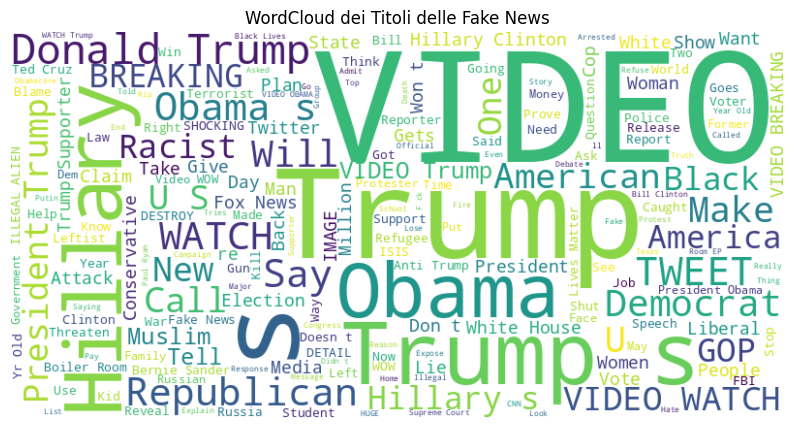

In [ ]:
#I titoli delle fake news presentano dei pattern?

from wordcloud import WordCloud

# Generiamo una wordcloud dei titoli delle fake news
fake_titles = " ".join(fake_news['title'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(fake_titles)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dei Titoli delle Fake News')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Uniamo titolo e testo per una migliore rappresentazione
df['content'] = df['title'] + " " + df['text']

# Separiamo le features e l'etichetta
X = df['content']
y = df['label']

# Dividiamo i dati in train e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trasformiamo i dati testuali in vettori TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Addestriamo un modello di regressione logistica
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Valutiamo il modello
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_tfidf)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9869710467706013
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4650
           1       0.98      0.99      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [ ]:
import pickle

# Salvare il modello e il vettorizzatore
with open('fake_news_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)